In [128]:
# set working directory
import os
os.chdir( "C:\\Users\\LENOVO\\Desktop\\Coursera\\1_Google_Advanced_Analytics\\7_Capstone\Files" )

In [129]:
# confirm correct location of raw data
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\Coursera\\1_Google_Advanced_Analytics\\7_Capstone\\Files'

In [130]:
os.listdir() # confirm name of file with raw data

['.ipynb_checkpoints',
 'Activity_ Course 7 Salifort Motors project lab.ipynb',
 'capstone_project-checkpoint.ipynb',
 'capstone_project.ipynb',
 'HR_capstone_dataset.csv']

In [131]:
import pandas as pd # import data
df0 = pd.read_csv( 'HR_capstone_dataset.csv', header = 0  )
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [132]:
df0.dtypes # check  column types

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [133]:
# count number of columns except for target column
buf1 = df0.dtypes.to_frame().rename( mapper = {0:"col_type"}, axis=1 ) # create series witn indices and rename column

In [134]:
buf1 = buf1.loc[ ~buf1.index.isin(["left"]) ] # exlude target variable
buf1["col_type"].value_counts()
# only 1 column is of character type 

int64      5
float64    2
object     2
Name: col_type, dtype: int64

In [135]:
### lets check if values on categorical column are diverse to be used for modelling 
df0["Department"].value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: Department, dtype: float64

In [136]:
## We need to check count of missing values
df0.isna().sum(axis=0)  # no missing values are present

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [137]:
## check colum names which may requre fix
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [138]:
### fix column names
new_names = df0.columns.tolist()
new_names = [ x.lower() for x in  new_names ] # to lower case
new_names = [ x.replace(" ","_") for x in  new_names ] # replace tabl with snake notation
df0.columns = new_names

In [140]:
df0 = df0.rename( {"time_spend_company":"tenure"},axis = 1 )
df0.head(5)
# we confirm new column names

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [141]:
### are duplicated records present , it is highly imnpossble that 2 personts fitted the same values 
### of features
df0.duplicated().sum()

3008

In [142]:
new_names = [ x if x!="time_spend_company" else "tenure"  for x in new_names ]
new_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'tenure',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [143]:
df0[ df0.duplicated() ].sort_values( by = new_names ).head(7) # we confirm that duplicates are present 
 ## we would remove some of them because we assume entry error

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low


In [144]:
df1 = df0.drop_duplicates( keep="first" )
df1.duplicated().sum() # no duplicates are present

0

In [404]:
### next concern is selection of varibles for modelling, specifically, we can focus on single 
### categorical columns and check if churn rate depends on department

In [145]:
df1_del = df1[ ["left","department"] ]
df1_del

,left,department
0,1,sales
1,1,sales
2,1,sales
3,1,sales
4,1,sales
...,...,...
11995,0,management
11996,0,management
11997,0,management
11998,0,marketing


In [146]:
### we want to check if count of churned is different depending on department
buf1 = pd.crosstab( df1_del["left"] , df1_del["department"], normalize="columns" )
buf1

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,0.838115,0.877522,0.824477,0.81198,0.880734,0.833581,0.83965,0.830195,0.828666,0.826203
1,0.161885,0.122478,0.175523,0.18802,0.119266,0.166419,0.16035,0.169805,0.171334,0.173797


In [148]:
### left rate in management is lowest while left in hr is the highest ,therefore
### if I am told department name , it provides usefull information on expected retention rate
### Next,  proceed with another approach to confirm that chirn rate  varies with department

df1_del_1 = df1_del.groupby(["department"]).count().rename( {"left":"tot_employee"}, axis = 1 )
df1_del_2 = df1_del.groupby(["department"]).sum()

In [149]:
df1_del_1_2 = df1_del_1.join( df1_del_2 ,  on="department", how="left" )
df1_del_1_2["share"] = df1_del_1_2["left"] /  df1_del_1_2["tot_employee"]
df1_del_1_2 = df1_del_1_2.sort_values( ["share"] )
df1_del_1_2

,tot_employee,left,share
department,,,
management,436,52,0.119266
RandD,694,85,0.122478
product_mng,686,110,0.160350
IT,976,158,0.161885
marketing,673,112,0.166419
sales,3239,550,0.169805
support,1821,312,0.171334
technical,2244,390,0.173797
accounting,621,109,0.175523


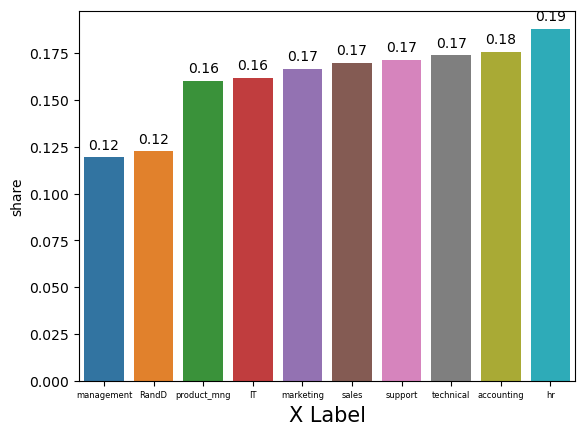

In [150]:
#### above table confirms same result as  result produce by crosstab , we keep this column for prediction,
#### use seaborn to visualiza data
import matplotlib.pyplot as plt
import seaborn as sns

b = sns.barplot( df1_del_1_2.reset_index() , x="department", y="share" )

for g in b.patches:
    b.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

b.set_xlabel("X Label",fontsize=15)
b.tick_params(axis = "x" , labelsize=6)

In [151]:
##### some of the features like satisfaction rate must contain values bounded by 0 and 1
df1.describe()
# satisfaction level and last_evaluation 
# are bounded between 0 and 1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [152]:
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='tenure'>

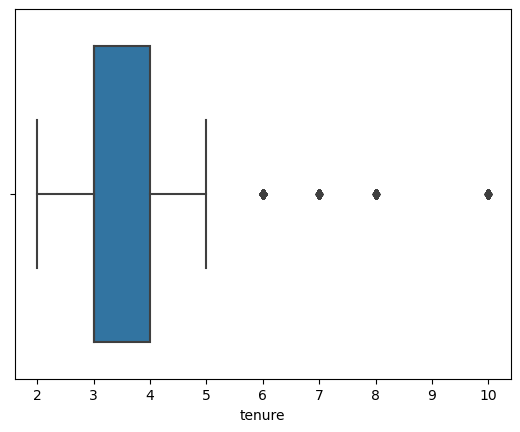

In [153]:
##### We would ceck for outliers in time spend in company
sns.boxplot( data = df1 ,  x = "tenure"  ) # some values are beyond interquantile range , we 
  # would create additional column to indicate employess with more than 5 years of experience

In [154]:
### we would create new feature called experience
import numpy as np
from sklearn.cluster import KMeans
x = np.array( df1["tenure"] )
x = x.reshape(-1, 1)
x

array([[ 3],
       [ 6],
       [ 4],
       ...,
       [10],
       [10],
       [ 3]], dtype=int64)

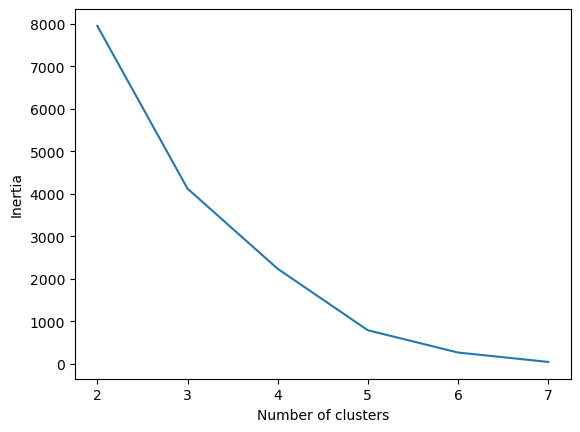

In [155]:
# Create a list from 2-10. 
num_clusters = [i for i in range(2, 8)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

inertia = kmeans_inertia(num_clusters, x)
inertia

# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [166]:
### Elbow would be located at value of 5, therefore we would assume 5 distinct clusters for tenure
kms = KMeans(n_clusters=5, random_state=42)
kms.fit(x)
type( kms.labels_)

numpy.ndarray

In [167]:
df1.loc[: , ("tenure_cluster") ] = [str(x) for x in  kms.labels_]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17460\1275462421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[: , ("tenure_cluster") ] = [str(x) for x in  kms.labels_]


In [168]:
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,tenure_cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,2
4,0.37,0.52,2,159,3,0,1,0,sales,low,3


In [183]:
## debug by checking average tenure behind cluster
df1.groupby( ["tenure_cluster"] ).agg({'tenure' : [np.min,np.max, np.mean] } )

tenure               
                 amin amax      mean
tenure_cluster                      
0                   2    2  2.000000
1                   4    4  4.000000
2                   5    7  5.429918
3                   3    3  3.000000
4                   8   10  9.138298

In [177]:
######### are there relation between churn and tenure cluster
buf1 = pd.crosstab( df1["left"] , df1["tenure_cluster"], normalize="columns" )
buf1
### yes, from 5 to 7 years of experience (group 2) have highest chances of retention

tenure_cluster,0,1,2,3,4
left,,,,,
0,0.989347,0.753117,0.651943,0.831599,1.0
1,0.010653,0.246883,0.348057,0.168401,0.0


<Axes: xlabel='left', ylabel='tenure'>

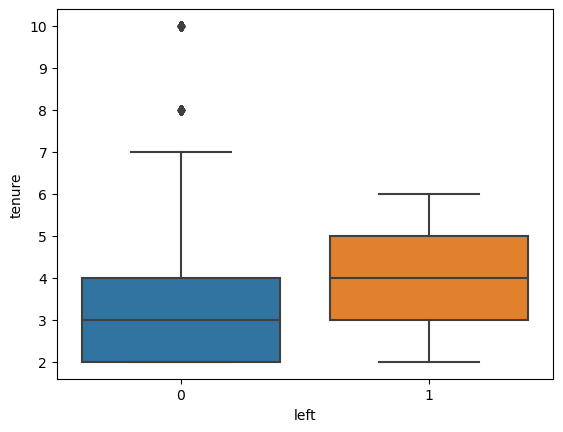

In [182]:
sns.boxplot(data= df1 , x="left" , y="tenure") 
## promising separation between tenure and retention, having 
## experience close to 5 years increases retention chances 

<Axes: xlabel='left', ylabel='satisfaction_level'>

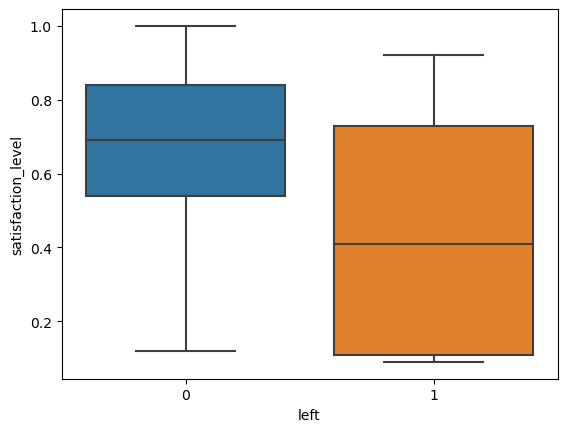

In [184]:
sns.boxplot(data= df1 , x="left" , y="satisfaction_level") 
## clearly , high satisfaction correcsponds to low retention

<Axes: xlabel='left', ylabel='last_evaluation'>

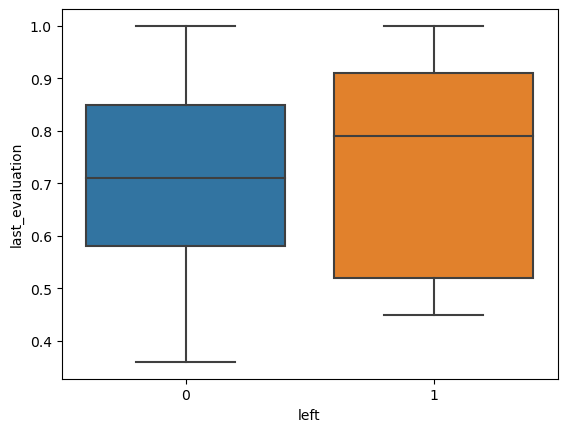

In [185]:
sns.boxplot(data= df1 , x="left" , y="last_evaluation") 
## no clear separation between last evaluation and left chances

<Axes: xlabel='left', ylabel='average_montly_hours'>

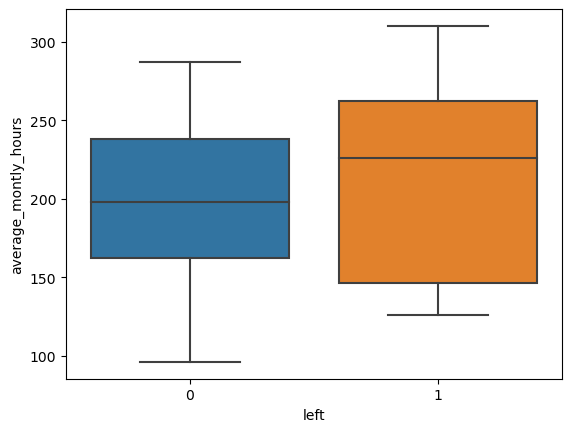

In [186]:
sns.boxplot(data= df1 , x="left" , y="average_montly_hours") 
## no clear separation between average_montly_hours and left chances
## however people tend to leave as they tend to work more than people who left

In [187]:
#### We want to check correlation between numerical values , to explore variabell with high correlation
# df1.dtypes
df_num = df1.select_dtypes( include="number" ).drop( ["promotion_last_5years","left","work_accident"] , axis = 1)
df_num.corr().round(2)
### no clear values to be excluded due to high correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure
satisfaction_level,1.00,0.10,-0.13,-0.01,-0.15
last_evaluation,0.10,1.00,0.27,0.26,0.10
number_project,-0.13,0.27,1.00,0.33,0.19
average_montly_hours,-0.01,0.26,0.33,1.00,0.10
tenure,-0.15,0.10,0.19,0.10,1.00


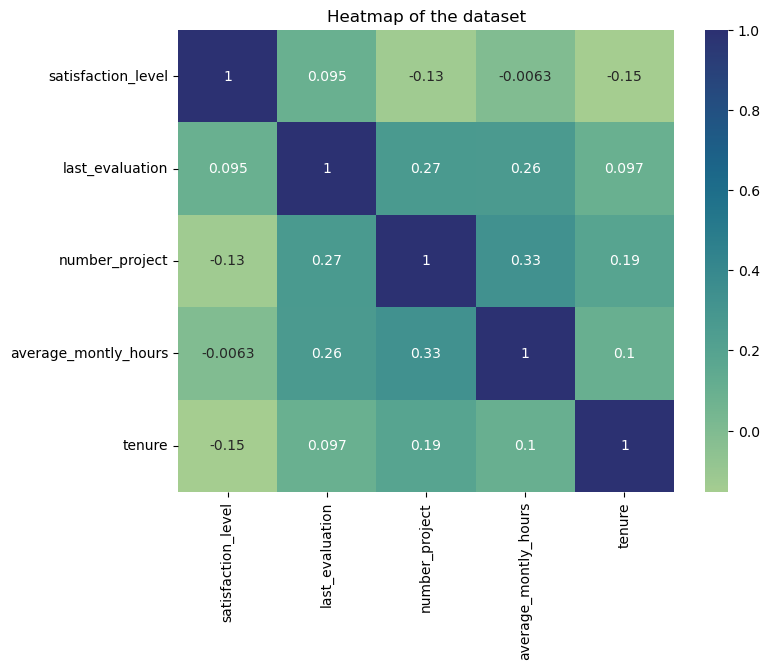

In [189]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_num[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()
## moderate correlation between number of projects and average monthly rate

In [190]:
## lets run Random forest to check what values are initially considered the most impactfull,
## exluding onject columns
y = df1["left"]
x = df1.select_dtypes( include="number" ).drop( ["promotion_last_5years","work_accident","left"] , axis = 1)
x.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
11995,0.90,0.55,3,259,10
11996,0.74,0.95,5,266,10
11997,0.85,0.54,3,185,10
11998,0.33,0.65,3,172,10


In [191]:
from sklearn.ensemble import RandomForestClassifier
rnf_clf = RandomForestClassifier( n_estimators = 3000 , 
                                  max_features = 3,
                                  oob_score=True)

rnf_clf.fit( x,y ) 
rnf_clf.oob_score_ # what is accuracy so far

0.9846551580351931

In [193]:
feature_scores = pd.Series(rnf_clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores
### satisfaction level , number of project, tenure and work load clearly are direct indicators of 
### variables which affect churn rate

satisfaction_level      0.417637
number_project          0.176213
tenure                  0.139181
average_montly_hours    0.139030
last_evaluation         0.127939
dtype: float64

In [194]:
## repeat the process above but keep also binary labels
x = df1.select_dtypes( include="number" ).drop( ["left",] , axis = 1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1
11996,0.74,0.95,5,266,10,0,1
11997,0.85,0.54,3,185,10,0,1
11998,0.33,0.65,3,172,10,0,1


In [195]:
rnf_clf.fit( x,y ) 
rnf_clf.oob_score_ # what is accuracy so far

0.9851555333166542

In [196]:
feature_scores = pd.Series(rnf_clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores
### almost same rating as above , repeat with dummy with department

satisfaction_level       0.376578
number_project           0.181289
tenure                   0.158869
average_montly_hours     0.152819
last_evaluation          0.126775
work_accident            0.003170
promotion_last_5years    0.000499
dtype: float64

In [201]:
x = df1.drop( ["left"], axis = 1 )
x = pd.get_dummies(x)
x.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,...,department_support,department_technical,salary_high,salary_low,salary_medium,tenure_cluster_0,tenure_cluster_1,tenure_cluster_2,tenure_cluster_3,tenure_cluster_4
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [202]:
rnf_clf = RandomForestClassifier( n_estimators = 3000 , 
                                  max_features = 6, # we add more features for forest as now we employ more variables
                                  oob_score=False)
rnf_clf.fit( x,y ) 
# rnf_clf.oob_score_ # we skip the part as with more variable we still expect reasonable accuracy

RandomForestClassifier(max_features=6, n_estimators=3000)

In [203]:
feature_scores = pd.Series(rnf_clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores
### almost same rating as above , presence of more variabeles
### affects importance of tenure, also last evaluation is correlated moderately with 
### average_montly_hours 

satisfaction_level        0.327960
number_project            0.178425
average_montly_hours      0.149731
last_evaluation           0.118362
tenure                    0.076011
tenure_cluster_2          0.059062
tenure_cluster_3          0.029530
tenure_cluster_0          0.014336
tenure_cluster_1          0.010940
work_accident             0.005754
salary_low                0.004393
department_sales          0.002946
salary_medium             0.002920
department_technical      0.002862
salary_high               0.002816
department_support        0.002637
department_IT             0.001580
department_RandD          0.001501
department_accounting     0.001430
tenure_cluster_4          0.001414
department_management     0.001234
department_marketing      0.001234
department_hr             0.001183
department_product_mng    0.000971
promotion_last_5years     0.000766
dtype: float64

In [204]:
### Conclusions , top 4 most explanatory variables remain the same , 
### so far we assume that salary, department , work accident , and evaluation produce least effect on churn rate

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

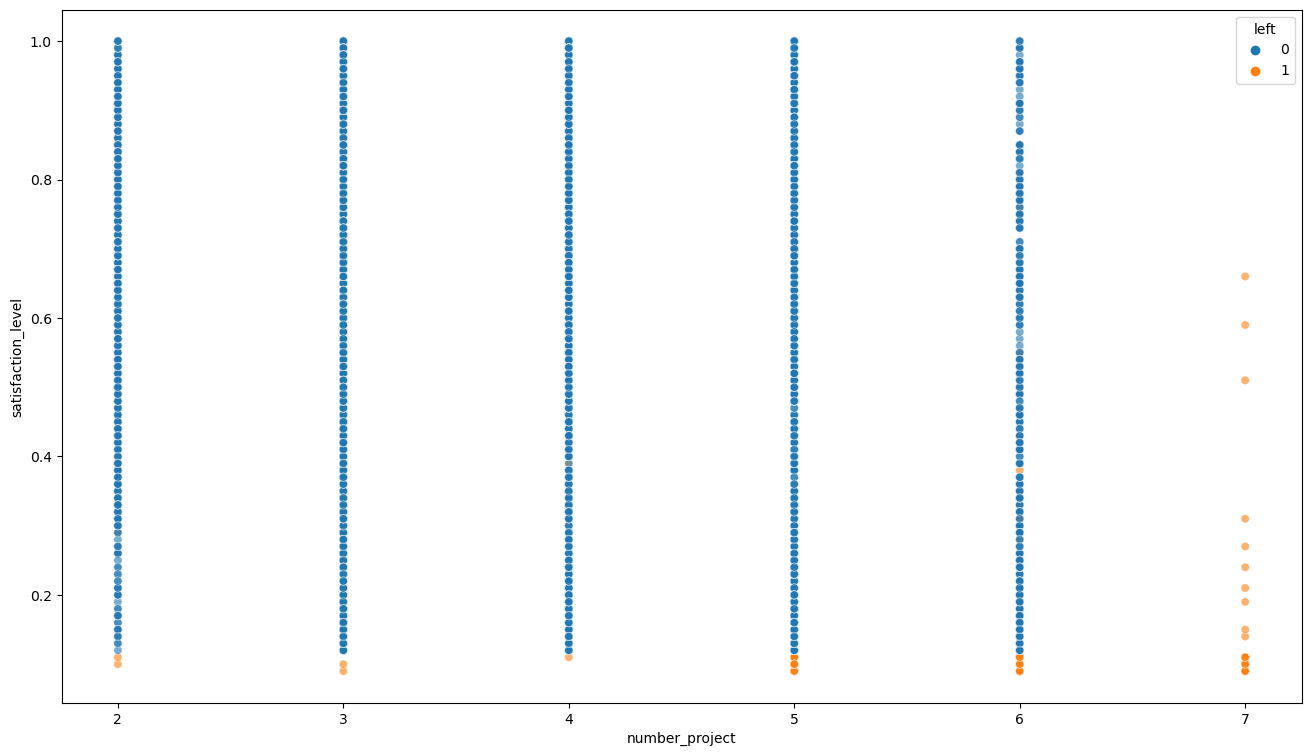

In [206]:
#### can we look on what are relation between satisfaction, number of projects and churn 
#### between them correlation is negative with alue of -0.13 , insignifficant and negative
#### lets visualize  satisfaction level , average mon hours and left or stayed
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
sns.scatterplot( data=df1 ,  x="number_project" ,  y='satisfaction_level', hue='left', alpha=0.6 )
### customers with 7 projects churned indicating excess working pressure

### !!! Therefore, more than 6 projects lead to low satisfaction and churn rate
### More than 6 projects negatively affects satisfaction level , the effect is not pronounce

In [207]:
#### what are average working hours for peoplw depending on progect
## what are relation between salary and avera work load
df1.groupby( ["number_project","left"] )["average_montly_hours"].mean()
#   for 3  - 6 groups , average working hours are slightly greater for 
# churned customers compare to non churned

number_project  left
2               0       186.880000
                1       146.143524
3               0       197.177197
                1       212.052632
4               0       201.241879
                1       242.143460
5               0       202.706349
                1       244.495627
6               0       198.617582
                1       269.361186
7               1       275.620690
Name: average_montly_hours, dtype: float64

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

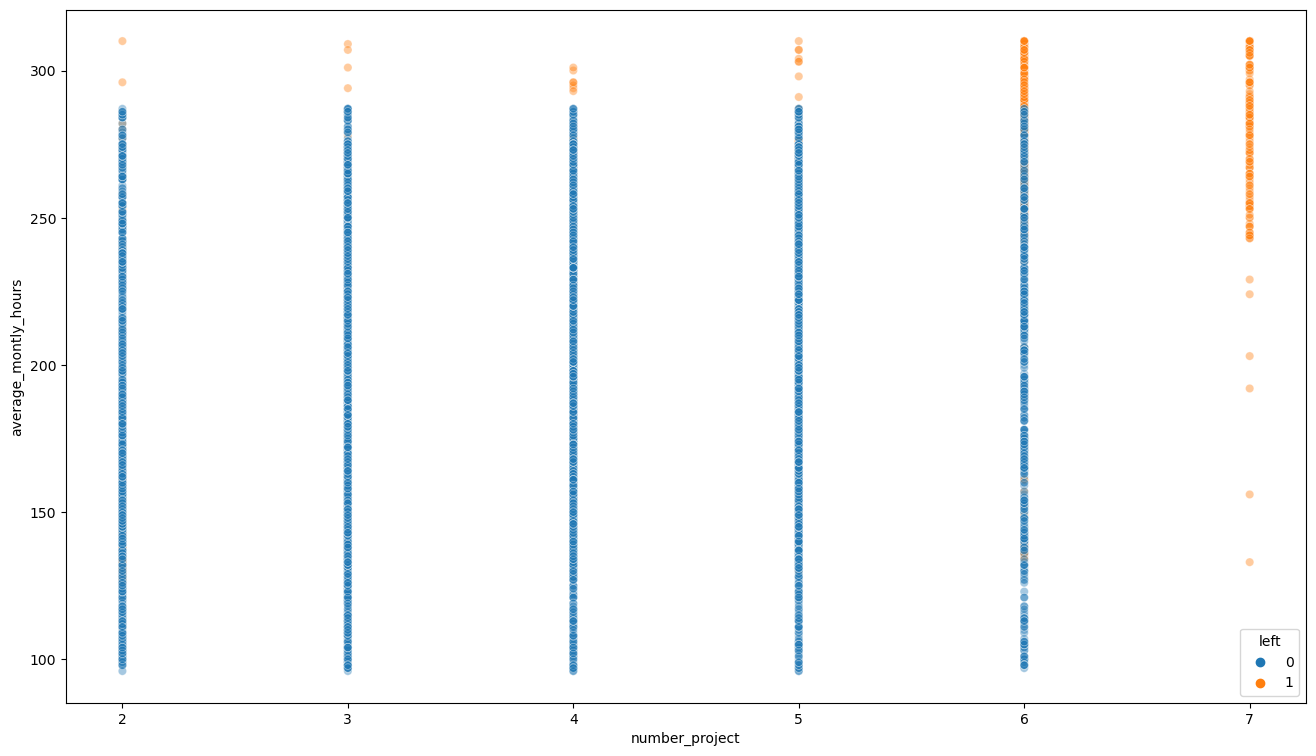

In [210]:
plt.figure(figsize=(16, 9))
sns.scatterplot( data=df1 ,  x="number_project" ,  y='average_montly_hours', hue='left', alpha=0.4 )
## plot confirms that churned customers for most of the groups overwork

In [209]:
### !!! Conclusion so far, 
# More than 6 projects are associatd with very probable churn
# More than 200 working hours per month are also associated with greater risk of churn
# 5 years of experience increases changes of Churn

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

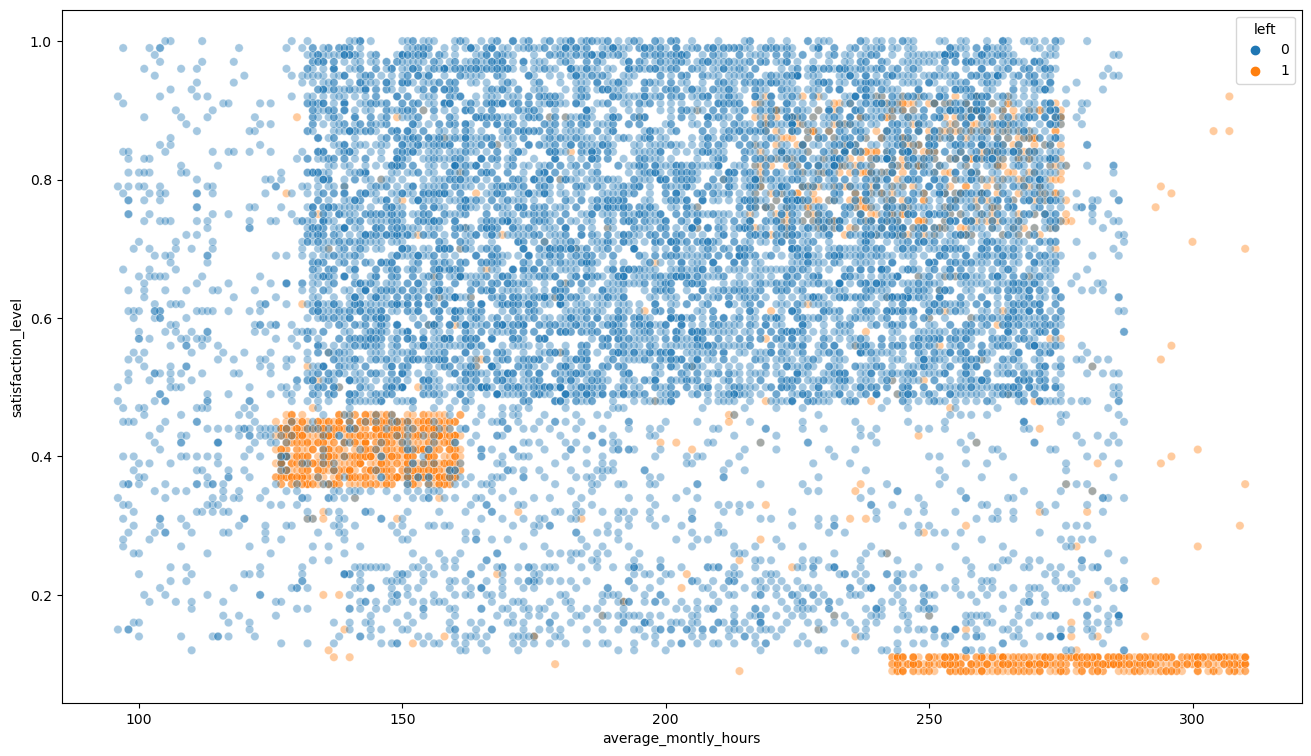

In [211]:
#### lets visualize  satisfaction level , average mon hours and left or stayed
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
sns.scatterplot( data=df1 ,  x="average_montly_hours" ,  y='satisfaction_level', hue='left', alpha=0.4 )

In [433]:
# The plot indicates 2 clusters of customers which left the company, 
# people with low satisfaction and the one which overwork (bottom right) and 
# people with average and below average hours , normal workload , and satisfaction level below 0.5
# average workload is 170 180 hours

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

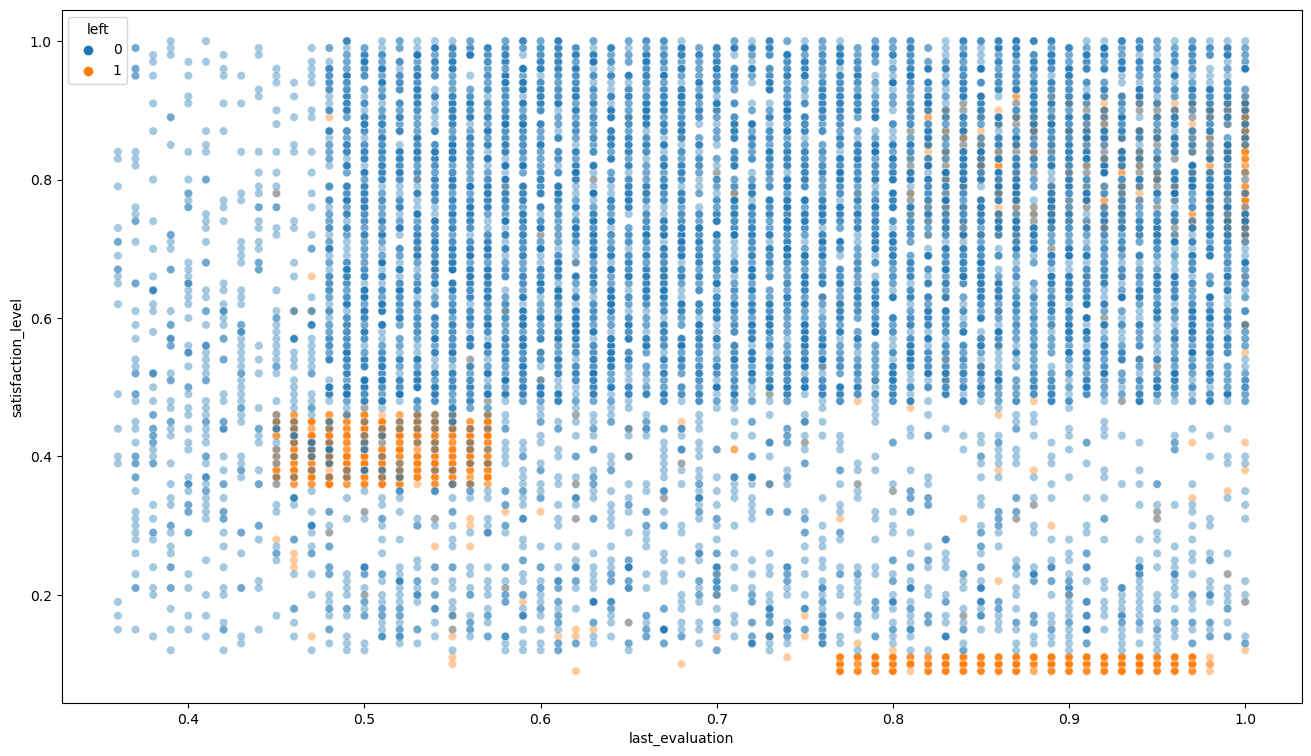

In [212]:
#### lets visualize  satisfaction level , average mon hours and left or stayed
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
sns.scatterplot( data=df1 ,  x="last_evaluation" ,  y='satisfaction_level', hue='left', alpha=0.4 )

## Intuitevely we may conclude that low evaluation forces clients to leave however, 
## visuals indicate that high evaluation can be associated with high churn , 
## which can indicate that certain segment of customers are not satisfied , 
## overwork and receive high evaluation

<Axes: xlabel='average_montly_hours', ylabel='last_evaluation'>

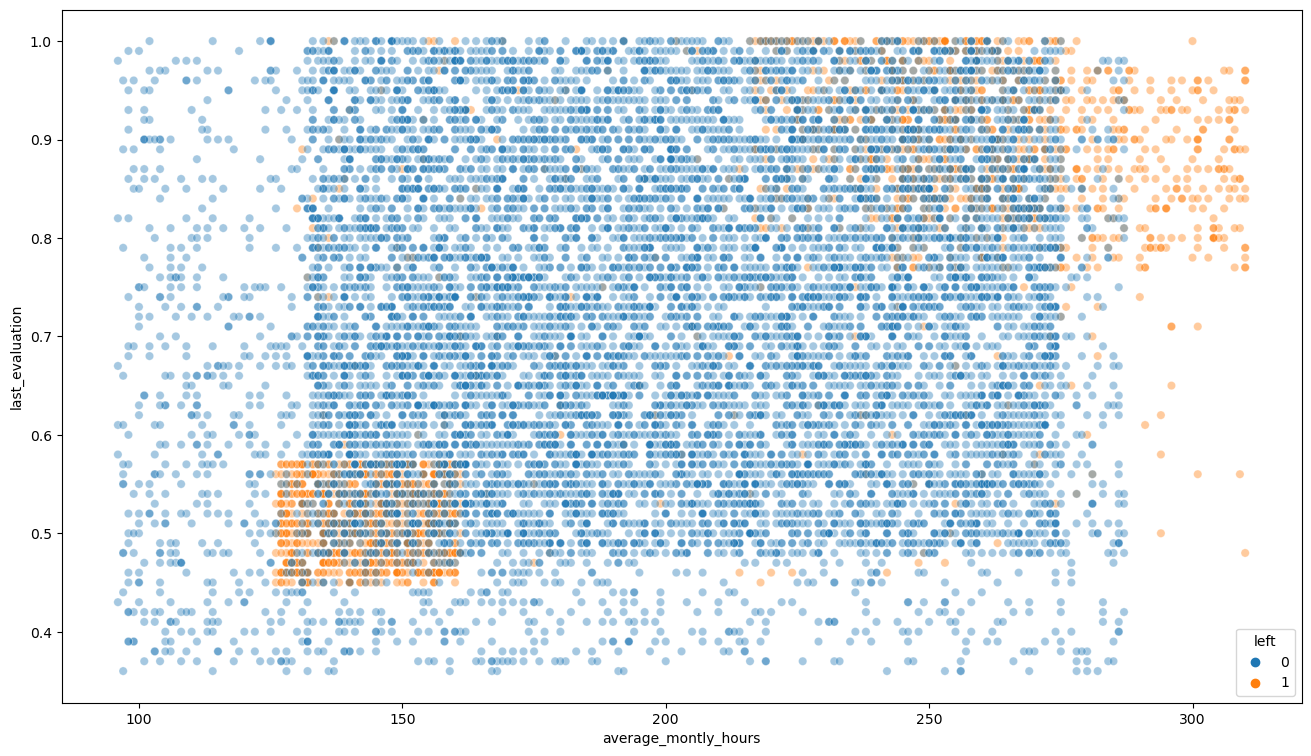

In [213]:
### dows excess working hours affects positive evaluation score
plt.figure(figsize=(16, 9))
sns.scatterplot( data=df1 ,  x="average_montly_hours" ,  y='last_evaluation', hue='left', alpha=0.4 )
#### high evaluation is present for both churned and non churned customers
#### working overtime does not guarantee high evaluation score which may result in unsatisfied custoemrs

In [214]:
### what can we concluded about salary and churn rate
buf1 = pd.crosstab( df1["left"] , df1["salary"], normalize="columns" )
buf1
#  chirn rate is highest for low salary , howeve difference comapre to medium is not sognifficant

salary,high,low,medium
left,,,
0,0.951515,0.79547,0.85383
1,0.048485,0.20453,0.14617


In [215]:
## what are relation between salary and aver work load
df1.groupby( ["salary","left"] )["average_montly_hours"].mean()
## churned customers across 3 salaryc ategories on average
## have identical workload, there is slight bias towards apr 10 hours more
## working hours for churned
## We already know that churned custoemrs churn due to low satisfaction ,overload, 
## but salary does not produce meaningfull separation of churned vs non churned

salary  left
high    0       199.919321
        1       202.979167
low     0       198.668857
        1       207.324532
medium  0       199.016251
        1       209.764629
Name: average_montly_hours, dtype: float64

<Axes: xlabel='salary', ylabel='average_montly_hours'>

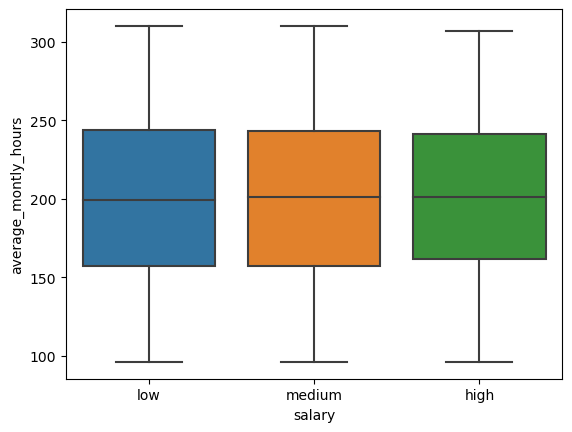

In [216]:
### Lets explore relation between satisfaction level and retention chances
sns.boxplot(data= df1 , x="salary" , y="average_montly_hours") 
## no clear separation between last evaluation and left chances

In [463]:
####### Lets proceed to modelling with random forest classifier

In [217]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'tenure_cluster'],
      dtype='object')

In [256]:
x = df1.drop( ["left","department"] , axis = 1 )
y = df1["left"]

In [257]:
### generate dummy varibales
x_dummy = pd.get_dummies(x)

In [258]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_dummy, y, test_size = 0.25 , random_state = 42 ,  stratify = y )

In [259]:
rf_clf = RandomForestClassifier(n_estimators= 2000 , n_jobs = -1)

In [260]:
### define hyperparameters grid
params_grid = {
        "max_depth" : np.arange(3,5),
        "min_samples_split" : np.arange(3,5),
        "min_samples_leaf" : np.arange(3,5),
        "max_features" : np.arange(5 ,  7 ) # only 5
    }
params_grid

{'max_depth': array([3, 4]),
 'min_samples_split': array([3, 4]),
 'min_samples_leaf': array([3, 4]),
 'max_features': array([5, 6])}

In [263]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

f1_scorer = make_scorer( f1_score )

In [264]:
rf1 = GridSearchCV(  estimator = rf_clf ,
                     param_grid = params_grid,
                     scoring = f1_scorer  )

rf1.fit( x_train, y_train )

GridSearchCV(estimator=RandomForestClassifier(n_estimators=2000, n_jobs=-1),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([5, 6]),
                         'min_samples_leaf': array([3, 4]),
                         'min_samples_split': array([3, 4])},
             scoring=make_scorer(f1_score))

In [265]:
## check best score
rf1.best_score_

0.9323244453291798

In [266]:
## check best params
rf1.best_params_

{'max_depth': 4,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [267]:
rf1.best_estimator_

RandomForestClassifier(max_depth=4, max_features=6, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=2000, n_jobs=-1)

In [268]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data) # we used best model derived from grid search

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
                 
         # generate data frame from distionaries
    table = pd.DataFrame( {'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy]
                         } )
  
    return table

In [269]:
rf2_test_scores = get_scores('random forest2 test', rf1, x_test, y_test)
rf2_test_scores

#	model	precision	recall	f1	accuracy
# 0	random forest2 test	0.978541	0.915663	0.946058	0.982655 , WITHOUT DEPARTMENT

# model	precision	recall	f1	accuracy
# 0	random forest2 test	0.982709	0.684739	0.807101	0.94563, WITH DEPARTMENT

,model,precision,recall,f1,accuracy
0,random forest2 test,0.974359,0.915663,0.944099,0.981988
